In [ ]:
!pip install mediapipe

     |████████████████████████████████| 30.1 MB 13 kB/s 


# import relevant libraries


In [ ]:
!pip install mediapipe

In [ ]:
import cv2
import mediapipe as mp
import os
import numpy as np
from google.colab.patches import cv2_imshow

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose


# Photo to Array

extract 13 * 4 landmarks from each photo;
save in "/content/drive/MyDrive/Into the Unknown/dataset/raw_arrays"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
input_path = '/content/drive/MyDrive/Into the Unknown/dataset/raw_photos'
output_path = '/content/drive/MyDrive/Into the Unknown/dataset/raw_arrays'
lst = os.listdir(input_path)

# make folders
for people in lst:
  sub_lst = os.listdir(input_path + '/' + people)
  path = output_path + '/' + people
  if not os.path.exists(path):
    os.mkdir(path)
  for label in sub_lst:
    if len(label.split('.')) != 2:
      path = output_path + '/' + people + '/' + label
      if not os.path.exists(path):
        os.mkdir(path)
  # print(sub_lst)

In [6]:
from google.colab.patches import cv2_imshow
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:

      for people in lst:
        sub_lst = os.listdir(input_path + '/' + people)

        # extract landmarks into results
        file = input_path + '/' + people + '/' + 'ref.jpg'
        frame = cv2.imread(file)
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = pose.process(image)

        # showing the image
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                  )               
        cv2_imshow(image)

        # convert landmarks into array
        m = []
        for l in results.pose_landmarks.landmark[:13]:
            m.append([l.x, l.y, l.z, l.visibility])
        
        m_array = np.array(m)
        save_path = output_path + '/' + people + '/' + 'ref.npy'
        print(m_array.shape)
        np.save(save_path, m_array)


        sub_lst = os.listdir(input_path + '/' + people)
        for label in sub_lst:
          if len(label.split('.')) != 2:
            sub_path = '/' + people + '/' + label

            image_lst = os.listdir(input_path + sub_path)
            for image_name in image_lst:
              file = input_path + sub_path + '/' + image_name

              frame = cv2.imread(file)
              image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
              image.flags.writeable = False
              results = pose.process(image)

              # showing the image
              image.flags.writeable = True
              image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
              mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                      mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                      mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                        )               
              cv2_imshow(image)

              # convert landmarks into array
              m = []
              for l in results.pose_landmarks.landmark[:13]:
                  m.append([l.x, l.y, l.z, l.visibility])
              
              m_array = np.array(m)
              save_path = output_path + sub_path + '/' + image_name.split('.')[0] + '.npy'
              print(m_array.shape)
              np.save(save_path, m_array)



Output hidden; open in https://colab.research.google.com to view.

# Array to Extracted features

structure of feature: [sample, eye / shoulder alignment, sample - ref]

In [7]:
# trial
input_path = '/content/drive/MyDrive/Into the Unknown/dataset/raw_arrays'
output_path = '/content/drive/MyDrive/Into the Unknown/dataset/raw_features'
lst = os.listdir(input_path)
for people in lst:
  sub_lst = os.listdir(input_path + '/' + people)
  path = output_path + '/' + people
  if not os.path.exists(path):
    os.mkdir(path)
  for label in sub_lst:
    if len(label.split('.')) != 2:
      path = output_path + '/' + people + '/' + label
      if not os.path.exists(path):
        os.mkdir(path)

In [8]:
left_right = [[1, 4], [2, 5], [3, 6], [7, 8], [9, 10], [11, 12]]

for people in lst:
    sub_lst = os.listdir(input_path + '/' + people)

    ref_array = np.load(input_path + '/' + people + '/' + 'ref.npy')
    for label in sub_lst:
      if len(label.split('.')) != 2:
        sub_path = '/' + people + '/' + label
        array_list = os.listdir(input_path + sub_path)
        for array_name in array_list:
          cand_array = np.load(input_path +sub_path + '/' + array_name)
          diff = cand_array - ref_array

          a1 = np.array([cand_array[1] - cand_array[4]])
          a2 = np.array([cand_array[2] - cand_array[5]])
          a3 = np.array([cand_array[3] - cand_array[6]])
          a4 = np.array([cand_array[7] - cand_array[8]])
          a5 = np.array([cand_array[9] - cand_array[10]])
          a6 = np.array([cand_array[11] - cand_array[12]])


          feature = np.concatenate([cand_array,a1,a2,a3,a4,a5,a6, diff])

          save_path = output_path + sub_path + '/' + array_name
          feature = feature.flatten()
          print(feature.shape)
          np.save(save_path, feature)


(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)

# Appendix: Trial Round

In [ ]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

IMAGE_FILES = []
BG_COLOR = (192, 192, 192) # gray
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5) as pose:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.pose_landmarks:
      continue
    print(
        f'Nose coordinates: ('
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_height})'
    )

    annotated_image = image.copy()
    # Draw segmentation on the image.
    # To improve segmentation around boundaries, consider applying a joint
    # bilateral filter to "results.segmentation_mask" with "image".
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR
    annotated_image = np.where(condition, annotated_image, bg_image)
    # Draw pose landmarks on the image.
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)
    # Plot pose world landmarks.
    mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [ ]:
import os
import numpy as np

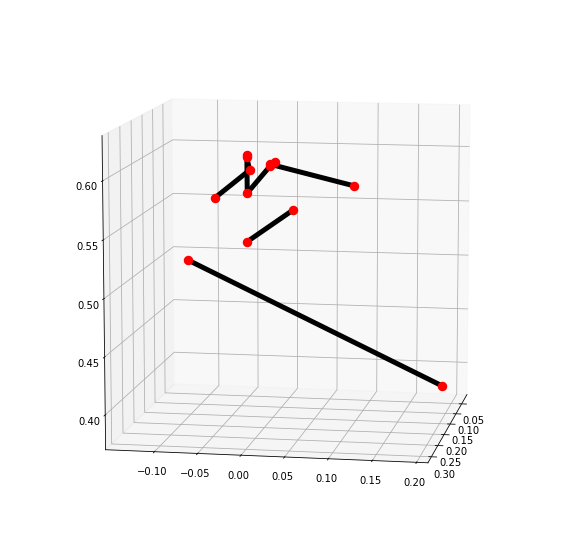

In [ ]:
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as pose:

    file = '/content/photo_2021-10-15_21-30-51.jpg'

    idx = 0

    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # print(
    #     f'Nose coordinates: ('
    #     f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
    #     f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_height})'
    # )

    annotated_image = image.copy()
    # Draw segmentation on the image.
    # To improve segmentation around boundaries, consider applying a joint
    # bilateral filter to "results.segmentation_mask" with "image".
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR
    annotated_image = np.where(condition, annotated_image, bg_image)
    # Draw pose landmarks on the image.
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)
    # Plot pose world landmarks.
    mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)


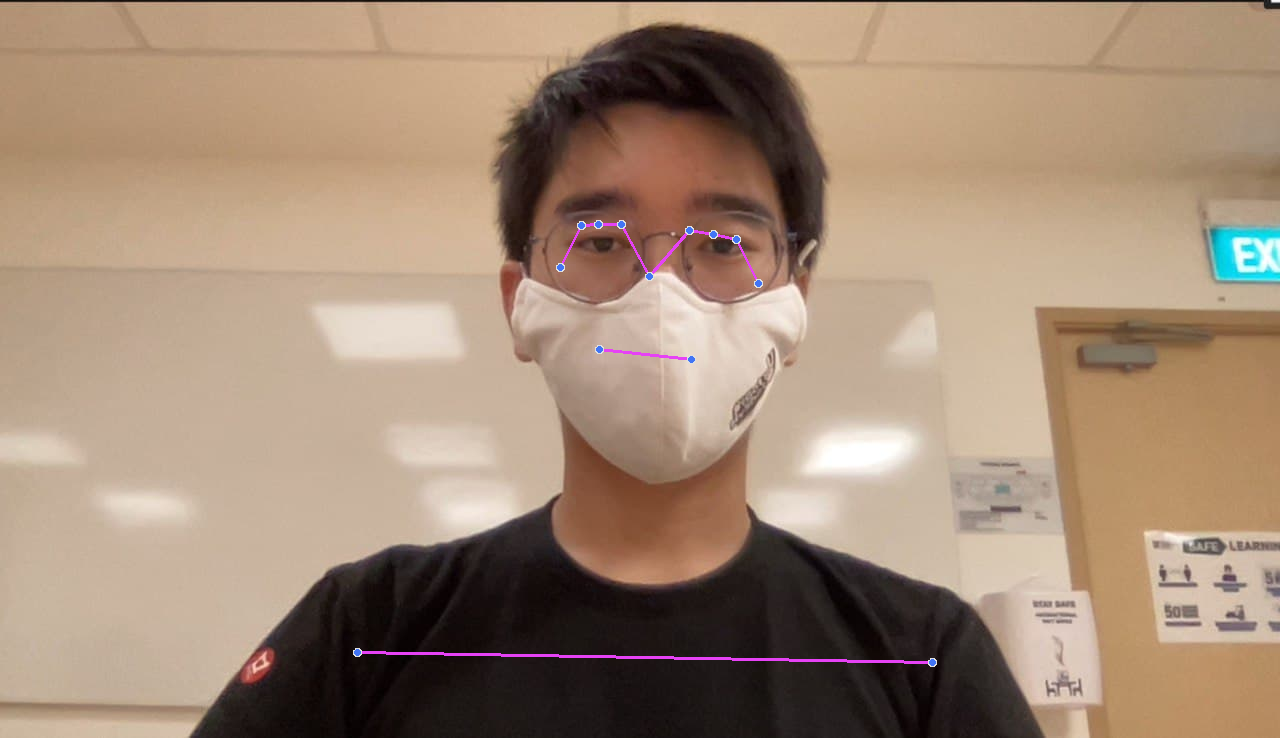

In [ ]:
from google.colab.patches import cv2_imshow
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:

      file = '/content/photo_2021-10-15_21-30-51.jpg'
      frame = cv2.imread(file)
      # Recolor image to RGB
      image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      image.flags.writeable = False
    
      # Make detection
      results = pose.process(image)
  
      # Recolor back to BGR
      image.flags.writeable = True
      image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
      
      # Render detections
      mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                )               
      
      cv2_imshow(image)



In [ ]:
results

mediapipe.python.solution_base.SolutionOutputs

In [ ]:
results.pose_landmarks

In [ ]:
len(results.pose_landmarks.landmark)

33

In [ ]:
m = []
for l in results.pose_landmarks.landmark[:13]:
  m.append([l.x, l.y, l.z, l.visibility])

In [ ]:
m